# Data Analysis CPSC368 Group 4: : Analyzing the impact of air quality and sanitation on public health


In [55]:
import oracledb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import pandas as pd

# 1. Introduction

The purpose of this research is to delve into the interconnection between PM2.5 air pollution levels, the provision of safely managed sanitation, and global mortality rates. Our investigation is particularly focused on sustainable cities, examining the collaborative impact of PM2.5 levels and advanced sanitation facilities on public health outcomes. This study aims to unravel the intricate dynamics of environmental factors and their direct implications for the health and well-being of populations worldwide.

The idea of investigating the impact of PM2.5 air pollution levels and the proportion of use of safely managed health services on global mortality is directly related to the overall theme of climate and sustainable development. The United Nations has defined 17 sustainable development goals, including "Climate Action," "Clean Water and Sanitation," and "Good Health and Well-being." Correspondingly, the level of PM2.5 air pollution is partly representative of the climate; the proportion of safely managed sanitation services is representative of sanitation; and the global mortality rate is representative of human health.

## Group Members:

- Yunxuan Zhang 88719752
- Yanxin Liang 50798412
- Yelia Ye 89657605

*Note: The order of names listed for the group members is in random sequence and does not reflect any hierarchy or order of contribution.*


# 2. Data Description

In our endeavor to understand the intricate relationship between environmental sustainability and health outcomes, we shall leverage three pivotal datasets. These datasets, curated by reputable sources, will be integrated to provide a comprehensive perspective on the factors influencing global mortality rates in the context of air pollution and sanitation.

### PM2.5 Air Pollution Dataset
The PM2.5 Air Pollution Dataset is sourced from Brauer et al. (2017) via the World Bank, processed and presented by Our World in Data. It provides detailed information on mean annual exposure to PM2.5 air pollution, measured in micrograms per cubic meter. This dataset encapsulates the severity of air pollution across various geographies, serving as a primary indicator of environmental quality.
- **Source**: [Our World in Data - Sustainable Cities](https://ourworldindata.org/sdgs/sustainable-cities)
- **Citation**: Brauer et al. (2017) via World Bank – Our World in Data.

### Global Death Rate Dataset
The Global Death Rate Dataset, as processed by Our World in Data, presents the grim reality of mortality attributable to air pollution. This dataset, originating from the IHME Global Burden of Disease Study (2019), quantifies deaths per 100,000 individuals, age-standardized for both sexes. It underscores the human cost of environmental neglect.
- **Source**: [Our World in Data - Air Pollution](https://ourworldindata.org/air-pollution)
- **Citation**: IHME, Global Burden of Disease Study (2019).

### Share Using Safely Managed Sanitation Dataset
The Share Using Safely Managed Sanitation Dataset illuminates the proportion of the population with access to secure sanitation facilities. Sourced from the United Nations (2023) and minimally processed by Our World in Data, this dataset is critical for assessing public health infrastructure's role in mitigating pollution-related risks.
- **Source**: [Our World in Data - Clean Water and Sanitation](https://ourworldindata.org/sdgs/clean-water-sanitation)
- **Citation**: United Nations (2023) – WHO/UNICEF JMP.

Each dataset, reflecting over 50 rows and 4 columns, is a testament to the rigorous data collection and analysis efforts by institutions such as the World Bank, the IHME, and the United Nations. The transparent and traceable methodologies employed in these datasets ensure their credibility and reliability, forming a robust foundatio for our analysis.


## 3. Data Acquisition

The following SQL queries and Python code detail the process of data acquisition from an Oracle database, transforming the raw data into structured Pandas DataFrames for further analysis.

*Note: The SQL queries are designed to retrieve aggregate data by year for a global perspective, thus enabling an analysis of trends over time.*


In [18]:
# Link to ubc's sql server and read the data
dsn = oracledb.makedsn('localhost', 1522, service_name='stu')
connection = oracledb.connect(user='ora_zyx97', password='a88719752', dsn=dsn)
cur = connection.cursor()

In [19]:
#find the total death rates for all countries in each year.
query_death = 'SELECT year, SUM(number_of_deaths) AS total_deaths FROM death_number GROUP BY year '
cur.execute(query_death)
#create a dataframe to store the annual total death rates for all countries.
df_death = pd.DataFrame(cur.fetchall(), columns=['year', 'total_deaths'])  #cited from https://stackoverflow.com/questions/12047193/how-to-convert-sql-query-result-to-pandas-data-structure

In [20]:
#Find the total sanitation levels across all countries for each year
query_sanitation = 'SELECT year, SUM(proportion_of_wastewater_treated_safely) AS total_sanitation FROM safely_managed_sanitation GROUP BY year'
cur.execute(query_sanitation)
df_sanitation = pd.DataFrame(cur.fetchall(), columns=['year', 'total_sanitation']) 

In [21]:
# find the total gdp across all countries for each year
query_gdp = 'SELECT year, SUM(gdp_per_capita) AS total_gdp FROM economic_information GROUP BY year'
cur.execute(query_gdp)
df_gdp = pd.DataFrame(cur.fetchall(), columns=['year', 'total_gdp']) 

## 4. Data Visualization


### Visual Trend Analysis

We present three line charts illustrating the trends over several years for key indicators: total deaths, total GDP, and sanitation levels.

#### Total Death Numbers vs. Year

The first chart shows a declining trend in the total number of deaths from 2010 to 2015. This suggests an improvement in conditions related to mortality over the years.

#### Total GDP vs. Year

The second chart displays the total GDP over the same period, which initially increases before slightly declining after 2014. This may reflect economic fluctuations over the years.

#### Total Sanitation Levels vs. Year

The final chart demonstrates a consistent upward trend in total sanitation levels. This indicates progressive improvements in sanitation over the period observed.

Each of these charts provides insights into the respective areas of public health and economic development, offering a clear visual representation of the changes and trends over the six-year span.



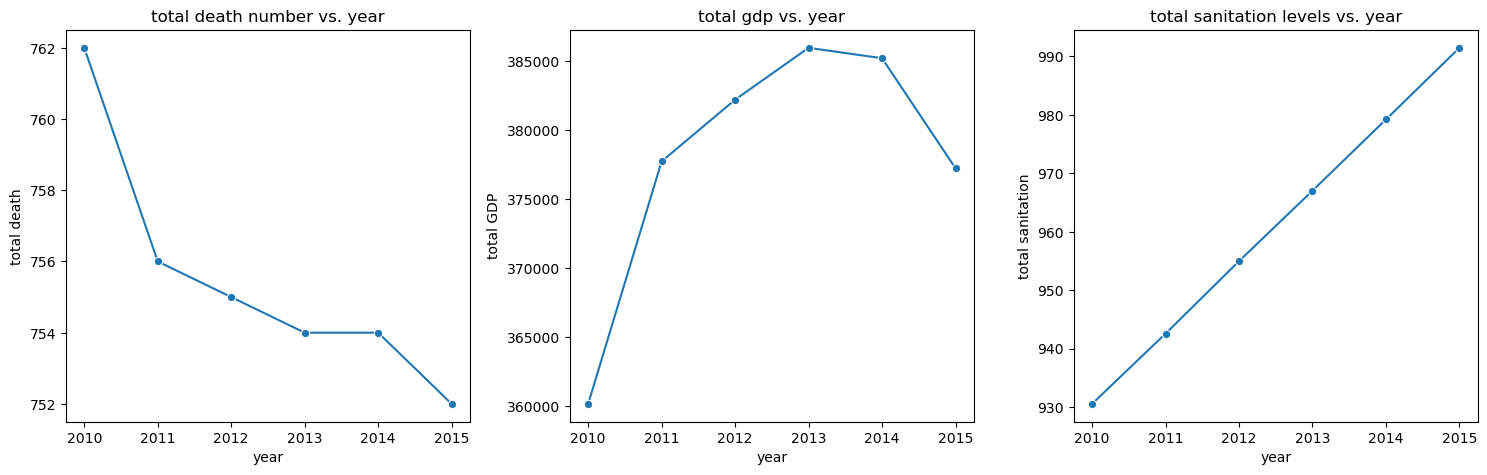

In [22]:
# create a figure with 1 row and 2 columns of subplots
f, axs = plt.subplots(1, 3,figsize=(15, 5))
sns.lineplot(data=df_death, x='year', y='total_deaths',marker='o',ax=axs[0]).set(title='total death number vs. year') #cited from https://python-graph-gallery.com/508-connected-scatter-plot-seaborn/
axs[0].set_xlabel('year') 
axs[0].set_ylabel('total death')
sns.lineplot(data=df_gdp, x='year', y='total_gdp',marker='o',ax=axs[1]).set(title='total gdp vs. year')
axs[1].set_xlabel('year') 
axs[1].set_ylabel('total GDP')
sns.lineplot(data=df_sanitation, x='year', y='total_sanitation',marker='o',ax=axs[2]).set(title='total sanitation levels vs. year')
axs[2].set_xlabel('year')
axs[2].set_ylabel('total sanitation')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


### Analysis of Environmental and Economic Factors on Death number

The series of scatter plots below explores the relationship between key environmental and economic factors against mortality rates in the year 2013.

#### PM2.5 Air Pollution and Death number

The first plot illustrates the correlation between PM2.5 levels and the number of deaths. A positive trend is observed, suggesting that higher PM2.5 values are associated with an increase in mortality rates. This aligns with the understanding that elevated pollution levels can adversely affect public health.

#### GDP per Capita and Death number

The second plot presents the relationship between GDP per capita and the number of deaths. A negative trend is indicated, implying that higher GDP per capita may be linked to lower mortality rates. This could reflect better healthcare and living conditions in more prosperous economies.

#### Sanitation Levels and Death number

The final plot assesses the link between the proportion of safely treated wastewater and mortality rates. Here, a negative trend suggests that better sanitation infrastructure correlates with fewer deaths, highlighting the importance of clean water and sanitation in reducing health risks.

Each plot incorporates a shaded area representing the confidence interval for the trend line, providing a visual sense of the reliability of the depicted trend. These relationships are crucial in understanding the multifaceted impact of environmental quality and economic status on public health.


In [62]:
query_2013 = 'SELECT country_code, value_of_pm25, number_of_deaths,gdp_per_capita, proportion_of_wastewater_treated_safely FROM pm25_air_pollution NATURAL JOIN death_number NATURAL JOIN economic_information NATURAL JOIN safely_managed_sanitation where year = 2013'
cur.execute(query_2013)
df_2013 = pd.DataFrame(cur.fetchall(),columns=['country_code', 'value_of_pm25', 'number_of_deaths', 'gdp_per_capita','proportion_of_wastewater_treated_safely'])

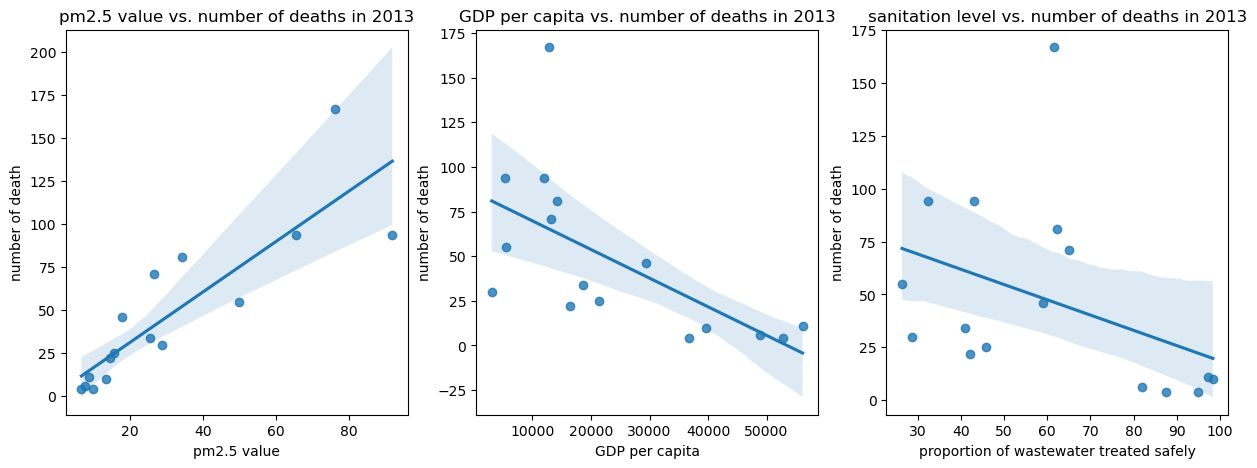

In [24]:
f2, axs2 = plt.subplots(1, 3,figsize=(15, 5))
sns.regplot(data=df_2013, x='value_of_pm25', y='number_of_deaths',marker='o',ax=axs2[0]).set(title = 'pm2.5 value vs. number of deaths in 2013')
axs2[0].set_xlabel('pm2.5 value') 
axs2[0].set_ylabel('number of death')
sns.regplot(data=df_2013, x='gdp_per_capita', y='number_of_deaths',marker='o',ax=axs2[1]).set(title = 'GDP per capita vs. number of deaths in 2013')
axs2[1].set_xlabel('GDP per capita') 
axs2[1].set_ylabel('number of death')
sns.regplot(data=df_2013, x='proportion_of_wastewater_treated_safely', y='number_of_deaths',marker='o',ax=axs2[2]).set(title = 'sanitation level vs. number of deaths in 2013')
axs2[2].set_xlabel('proportion of wastewater treated safely') 
axs2[2].set_ylabel('number of death')
plt.show()

### Comparative Death numbers Analysis by Country

The bar chart below provides a comparative view of the total number of deaths from each country over the years. The vertical axis represents the number of deaths, while the horizontal axis lists the countries by their codes.

The chart reveals significant variations among the countries. For instance:
- CHN (China) exhibits the highest total death count, which may reflect its large population size and environmental challenges.
- EGY (Egypt) presents an interesting case. The total number of deaths is relatively high, which might suggest specific local environmental or public health challenges This could be due to factors such as air quality, access to healthcare, or other socio-economic factors that could influence mortality rates related to pollution. The data prompts a closer examination of Egypt's policies and initiatives to improve public health and reduce deaths associated with environmental factors.
- USA (United States) also shows a high number of deaths, underscoring the public health impact of pollution in populous, industrialized nations.
- In contrast, countries like CAN (Canada) and AUS (Australia) report lower death counts, which might correlate with their environmental policies and healthcare systems.


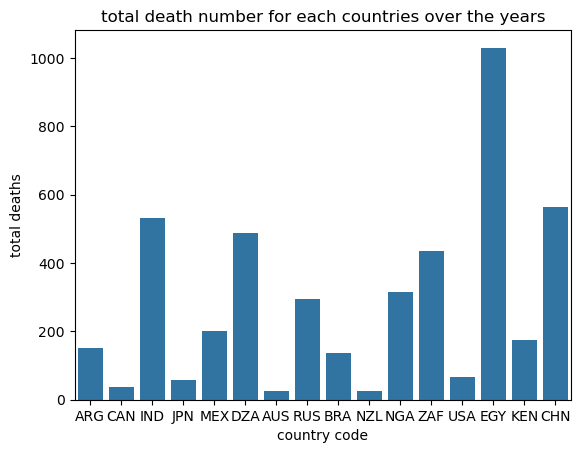

In [25]:
query_country_death='SELECT country_code, SUM(number_of_deaths) AS total_deaths FROM death_number GROUP BY country_code'
cur.execute(query_country_death)
df_country_death= pd.DataFrame(cur.fetchall(), columns=['country_code', 'total_deaths'])
sns.barplot(data=df_country_death, x='country_code', y='total_deaths').set(title='total death number for each countries over the years')
plt.xlabel('country code')
plt.ylabel('total deaths')
plt.show()

# 5. Regression Analysis Methodology


In our study, we implement a multifaceted approach to understanding the complex relationship between various socioeconomic factors and health outcomes, as measured by the mortality rates attributable to PM2.5 air pollution. Our primary analytical tool is multiple linear regression based on Ordinary Least Squares (OLS) — a cornerstone in the realm of econometrics and statistical modeling.

Given a dataset with $n$ observations, our model assumes the relationship between the dependent variable and independent variables can be described by the following linear equation:

\begin{equation}
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_k x_{ik} + \epsilon_i
\end{equation}

where:
- $y_i$ is the natural logarithm of the number of deaths due to air pollution for the $i^{th}$ observation.
- $\beta_0$ is the intercept term of the model.
- $\beta_j$ for $j = 1, \dots, k$ are the coefficients of the independent variables which represent the change in the log-transformed death rate with a one-unit change in the corresponding independent variable.
- $x_{ij}$ for $j = 1, \dots, k$ are the independent variables which include GDP, PM2.5 level, sanitation, and other factors (control variable) for the $i^{th}$ observation.
- $\epsilon_i$ is the error term for the $i^{th}$ observation, representing the deviation of the observed from the predicted value.


The Ordinary Least Squares (OLS) method is used to estimate the coefficients $\beta_j$ by minimizing the sum of squared residuals:

\begin{equation}
\min_{\beta_0, \beta_1, \dots, \beta_k} \sum_{i=1}^{n} \epsilon_i^2 = \min_{\beta_0, \beta_1, \dots, \beta_k} \sum_{i=1}^{n} (y_i - (\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_k x_{ik}))^2 \tag{2}
\end{equation}

The suitability of the model is evaluated based on the significance of the estimated coefficients, the $R^2$ value, and the residual diagnostic plots among other statistical metrics.

In [26]:
query_all = 'SELECT * FROM country NATURAL JOIN economic_information NATURAL JOIN death_number NATURAL JOIN pm25_air_pollution NATURAL JOIN safely_managed_sanitation '
cur.execute(query_all)
df_all = pd.DataFrame(cur.fetchall())
#rename the dataframe
df_all = df_all.rename(columns={0: 'country_code', 1: 'year', 2: 'country_name', 3: 'gdp', 4: 'death', 5: 'pm25',6:'sanitation'}).drop(columns=["country_code"])
#remove the extra space in country_name
df_all['country_name'] = df_all['country_name'].apply(lambda x: x.strip()) #cited from https://saturncloud.io/blog/how-to-remove-space-from-columns-in-pandas-a-data-scientists-guide/
#convert country_name into a set of binary variables 
df_dummy1 = pd.get_dummies(df_all, columns=['country_name'], drop_first=True) 

## 6. Conclusion

Our analysis using Ordinary Least Squares (OLS) regression reveals a strong model with an R-squared value of 0.997, indicating a significant explanation of mortality variance from air pollution.

**Key Findings:**

- A decrease in death numbers over the years suggests positive changes in health or environmental policies.
- GDP's non-significance in predicting mortality calls for a deeper look into its role in public health. This may also be due to the fact that the explanatory variables of GDP indicators in the model may have multicollinearity problems with other variables, resulting in endogeneity issues, which will be further explained in our analysis later.
- Positive coefficients for PM2.5 show that higher PM2.5 concentrations are associated with increased incidence of respiratory and cardiovascular diseases.
- Differences in coefficients by country highlight the varied impact of environmental factors on health across regions.

**Rationale for Using Logarithmic Transformations:**

Logarithmic transformations were applied to the model for several reasons:

- **Normalization**: Log transformations help in stabilizing the variance of the residuals, bringing them closer to normality, which is a key assumption in OLS regression.
- **Linearity**: They convert multiplicative relationships into additive, linear ones that can be more easily modeled and interpreted in the context of libusiness insights.

By using log transformations, we aimed to provide a more robust model that is better suited for interpreting the complex relationships between our predictors and the response variable.


In [56]:
# Multiplying the dummy variables by 1 ensures they are numeric
df_dummy1 = df_dummy1 * 1
# Applying the natural logarithm transformation to the 'death' column of df_all for the response variable
y = np.log(df_all['death'])
# Dropping the 'death' column from predictors if it exists and creating the independent variables dataframe
X = df_dummy1.drop(columns=['death'], errors='ignore')  # errors='ignore' will ignore any errors if the column 'death' is not present in df_dummy1
# Adding a constant to the independent variables to account for the intercept
X = sm.add_constant(X)
# Fitting the OLS model with the log-transformed response variable and the independent variables
model = sm.OLS(y, X).fit()
# Printing the summary of the OLS regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  death   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1189.
Date:                Fri, 22 Mar 2024   Prob (F-statistic):           5.37e-86
Time:                        17:38:03   Log-Likelihood:                 126.06
No. Observations:                  96   AIC:                            -212.1
Df Residuals:                      76   BIC:                            -160.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

## Correlation Matrix Visualization

We have visualized the correlation matrix using a heatmap to better understand the relationships between the variables. Below is the heatmap representation:

- A strong positive correlation of 0.89 is observed between `pm25` and `sanitation`, suggesting that these variables move in tandem.
- `gdp` has a strong negative correlation of -0.68 with `pm25`, indicating that as the GDP increases, the PM2.5 concentration tends to decrease.
- `sanitation` also shows a strong negative correlation of -0.58 with `pm25`, which might suggest that improvements in sanitation could be associated with a decrease in PM2.5 levels.

This heatmap aids in visualizing potential multicollinearity issues which should be taken into consideration when modeling.

<Figure size 1000x500 with 0 Axes>

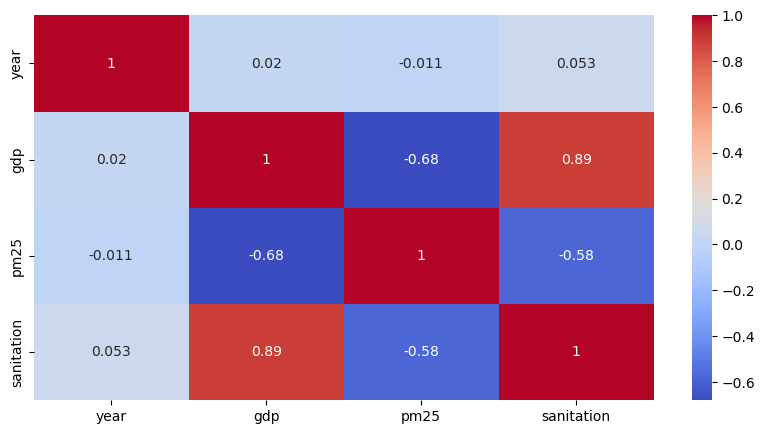

In [57]:
plt.figure(figsize=(10, 5))
columns_of_interest = ['year', 'gdp', 'pm25', 'sanitation']  
df_selected = df_dummy1[columns_of_interest]
correlation_matrix = df_selected.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm") 
plt.show()

### Model residual Plot Analysis

The residual plot shows a random scatter of points around the zero line, which is indicative of a well-fitting model. The residuals are approximately symmetrically distributed, suggesting no systematic error in the predictions. This pattern reflects a model with good stability, suitable for making predictions or inferring relationships between variables. We also present models without log transformations, including residual graphs. We can see that the residuals without adding the log have a classic funnel shape. We can describe this residual plot as exhibiting signs of heteroskedasticity, where the spread of the residuals appears to increase with the magnitude of the predicted values. 

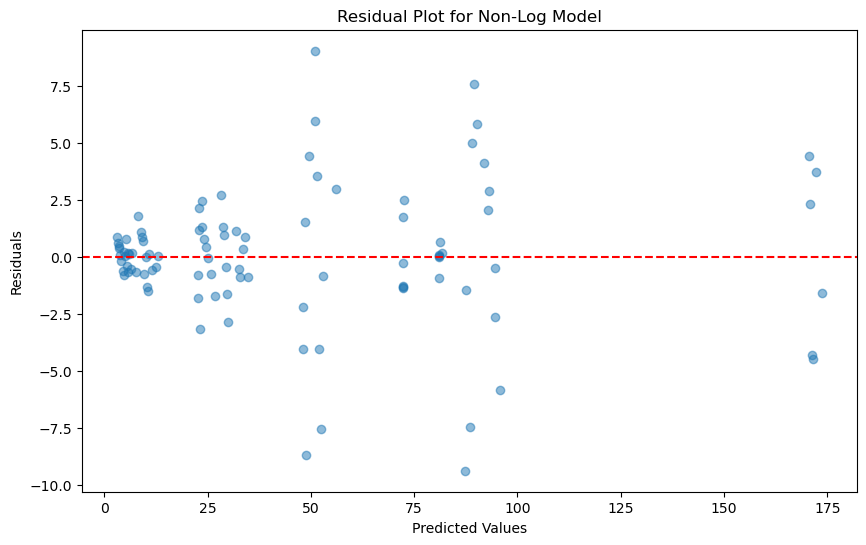

In [58]:
y1 = df_all['death']
X1 = df_dummy1.drop(columns=['death'], errors='ignore')  # errors='ignore' handles cases where 'death' is not in columns
X1 = sm.add_constant(X1)
model1 = sm.OLS(y1, X1).fit()
# Use model1 to predict y1
y1_pred = model1.predict(X1)
residuals1 = y1 - y1_pred
# Create the residual plot for the non-log-transformed model
plt.figure(figsize=(10, 6))
plt.scatter(y1_pred, residuals1, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Non-Log Model')
plt.show()

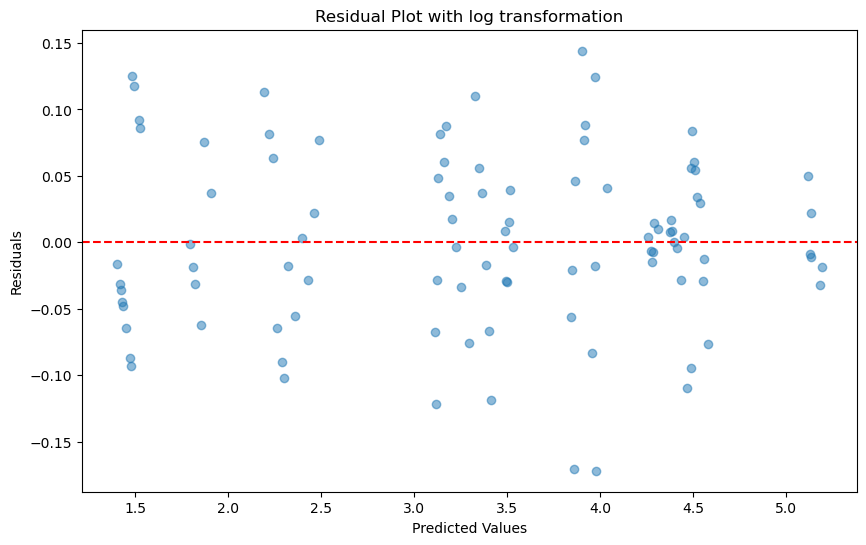

In [59]:
# Predict the values using the model based on the log-transformed Y
y_pred = model.predict(X)
# Calculate the residuals by subtracting the predicted values from the actual values
residuals = y - y_pred
plt.figure(figsize=(10, 6))
# Create a scatter plot of the predicted values versus the residuals
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot with log transformation')
# Display the plot
plt.show()

### Q-Q Plot Analysis

The Q-Q plot presented here illustrates how closely the residuals of our model align with a normal distribution. The points generally follow the red reference line, indicating that the residuals are well-distributed across the theoretical quantiles. This supports the assumption of normality in the error terms, an important consideration for the validity of OLS regression analyses. The few points that deviate from the line at the tails might indicate some minor issues with extreme values, but overall, the model appears to be performing well and can be considered stable for inference purposes.

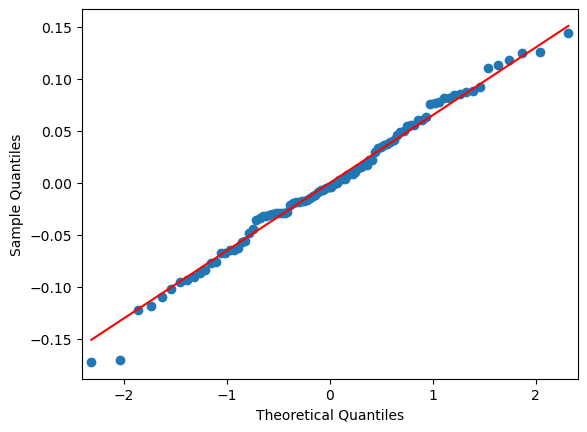

In [22]:
model = sm.OLS(y, X).fit()
residuals = model.resid
fig = sm.qqplot(residuals, line='s') 
plt.show()